# Network creation example - Striatum

Snudda was updated 2024 with a new structure for the network configuration file which now allows the user to split different regions into multiple files, to facilitate easier construction of multi-region simulations.

## The ```network.json``` file:

```
{
    "network_path": "my_network",
    "snudda_data": "/home/hjorth/HBP/BasalGangliaData/data",

    "random_seed": {
        "master_seed": 1234   
    },
    
    "regions": {
        "Striatum" : "striatum.json"
    }   
}
```

Note that ```network_path``` will get overwritten if you use Snudda.import_config with the ```network_path``` you specify at runtime. The ```snudda_data``` can also be overwritten at runtime if needed. Note that the paths will be converted to absolute paths. If you want to add additional regions, just include them in the ```regions``` dictionary.

Here ```snudda_data``` refers to the data available at ```https://github.com/Hjorthmedh/BasalGangliaData/tree/main/data```

Note that in this example we use the full striatal volume, but we only placed 2000 neurons (```num_neurons```). In reality we should have about 800000 neurons per hemisphere.

## The ```striatum.json``` file

```
{
    "Striatum": {
	"num_neurons": 2000,
	"volume": {
	    "mesh_file": "$SNUDDA_DATA/meshes/Striatum-dorsal-left-hemisphere.obj",
	    "d_min": 1.5e-5,
	    "num_putative_points": 100000,
	    "random_seed": 123456,
	    "!density": {
    		"my_neuron": {
    		    "density_function": "abs(x)"
    		}
	    },
	    "!neuron_orientation": {
    		"my_neuron": {
    		    "rotation_mode": "vector_field",
    		    "rotation_field_file": "my_rotation_file.json"
    		}
	    }
	},
	"neurons": ["neurons/dspn.json",
    		    "neurons/ispn.json",
    		    "neurons/fs.json",
    		    "neurons/chin.json",
    		    "neurons/lts.json"],
	"connectivity": ["$SNUDDA_DATA/connectivity/striatum/striatum-connectivity.json"],
	"populations": "pop1.json"
    }
}
```

The number of neurons can be specified in two ways, either using ```num_neurons``` in striatum.json, or by directly specifying ```num_neurons``` in the individual neuron json-files (e.g. ```neurons/dspn.json```).

Important that the volume of your ```mesh_file``` matches the ```num_neurons``` specified to get the correct density. In this the example volume is the dorsal left hemisphere and 1000 neurons as in this example, are TOO FEW for correct density of 80500 neurons/mm3.

Blocks starting with ```!``` are disabled, so here the ```density``` and ```neuron_orientation``` blocks are not used at runtime. Also there is no neuron ```my_neuron``` if you wanted to use orientation or density for the ```dspn``` neurons, then that should be specified as key.

## The ```dspn.json``` file

```
{
    "dSPN": {
    	"neuron_path": {
    	    "dSPN_0": "$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20211026",
    	    "dSPN_1": "$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20211026",
    	    "dSPN_2": "$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20211028",
    	    "dSPN_3": "$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c9_D1-mWT-1215MSN03-v20211026"
    	},
	
    	"neuron_type": "neuron",
    	"rotation_mode": "random",
    	"volume_id": "Striatum",
    	"stay_inside_mesh": false,
    	"fraction": 0.475
    }
}
```

This defines the ```dSPN``` neurons, the ```neuron_path``` dictionary names the individual neurons, and gives the location of them.

The ```neuron_type``` is either ```neuron``` or ```virtual_neuron```. If ```stay_inside_mesh``` is ```True``` then axons and dendrites on the border of the structure will bend to try and stay inside. It is a probabilistic algorithm so they are not guaranteed to always be inside.

The number of neurons can either be specified as a ```fraction``` and then the ```num_neurons``` from the region is used to calculate the number of neurons of this type (```fraction``` * region ```num_neurons``` = number of neurons of this type). If you specify ```num_neurons``` directly, it can either be a scalar (in case the number of neurons will be split between the different subtypes), or you can specify a list (of the same length as the number of subtypes) and then each subtype has their number directly specified. 

## The ```striatum-connectivity.json``` file:

```
{
    "FS,FS": {
        "GABA": {
            "conductance": [
                1.1e-09,
                1.5e-09
            ],
            "channel_parameters": {
                "tau1": [
                    0.00133,
                    1000.0
                ],
                "tau2": [
                    0.0057,
                    1000.0
                ],
                "mod_file": "tmGabaA"
            },
            "cluster_size": 1,
            "cluster_spread": null,
            "pruning": {
                "f1": 0.15,
                "soft_max": 5,
                "mu2": 2,
                "a3": 1,
                "dist_pruning": null,
                "cluster_pruning": false
            }
        },
        "gap_junction": {
            "conductance": [
                5e-10,
                1e-10
            ],
            "channel_parameters": null,
            "cluster_size": 1,
            "cluster_spread": null,
            "pruning": {
                "f1": 0.7,
                "soft_max": 8,
                "mu2": 2,
                "a3": 0.5,
                "dist_pruning": null,
                "cluster_pruning": false
            }
        }
    },
    "FS,dSPN": {
        "GABA": {
            "conductance": [
                1.1e-09,
                1.5e-09
            ],
            "channel_parameters": {
                "tau1": [
                    0.0012,
                    1000.0
                ],
                "tau2": [
                    0.008,
                    1000.0
                ],
                "parameter_file": "$SNUDDA_DATA/synapses/striatum/PlanertFitting-FD-tmgaba-fit.json",
                "mod_file": "tmGabaA"
            },
            "cluster_size": 1,
            "cluster_spread": null,
            "pruning": {
                "f1": 0.5,
                "soft_max": 5,
                "mu2": 2,
                "a3": 1.0,
                "dist_pruning": "exp(-(0.5*d/60e-6)**2)",
                "cluster_pruning": false
            }
        }
    },

(continued...)
```

```FS,dSPN``` refers to the connections between ```FS``` and ```dSPN```. In the next hierarchy the type of the connection is specified, for example ```GABA``` or ```gap_junction```.

The ```conductance``` is specified with two values, mean and std. 

The ```channel_parameters``` are specified with two values, the first value is the actual value in SI-units, and the second value is the scale factor to convert to NEURON natural units, e.g. seconds to milliseconds. The ```parameter_file``` specifies additional parameters, and the ```mod_file``` specifies which NEURON MOD file is used for the channel.

The ```cluster_size``` and ```cluster_spread``` are optional, if specified with ```cluster_size``` > 1 then each putative synapse location will receive ```cluster_size``` synapses spread within the ```cluster_spread``` distance on the dendrite. This will increase the number of detected synapses.

Another way to get clustering of synapses is during the pruning step, by using ```cluster_pruning``` ```true```, here rather than randomly picking synapses that are pruned (default), the synapses are instead ranked based on how close they are together, and the synapses with many neighbours are less likely to be removed, resulting in clustering.

The other pruning paramters are ```f1``` (remove a fraction of all putative synapses), ```soft_max``` (soft upper limit on number of synapses), ```mu2``` (remove pair connections with too few synapses, at ```mu2``` synapses there is a 50-50 chance of removing them), ```a3``` (fraction of all connected pairs to keep), ```dist_pruning``` (density profile for synapses, function of distance from soma).

## The ```pop1.json``` file:

```
{
    "populations": {
        "method": "radial_density",
        "centres": [[ 0.00475, 0.004, 0.00775 ],
                    [ 0.00475, 0.004, 0.00775 ]],
        "probability_functions": [
            "(d < 300e-6) * 1",
            "(d < 300e-6) * 1"
        ],
        "unit_id": [ 1, 2 ],
        "neuron_types": [["dSPN", "iSPN"],
                         ["dSPN", "iSPN"]],
        "num_neurons": [ 4000, 4000 ]
        
    }   
}
```

The ```radial_density``` means we use a radial density function, here the centres are specified and a density function (d is distance to center in meters). The ```unit_id``` specifies the numerical id of the particular population unit. These numbers are shared between ALL regions. With ```neuron_type``` you can speify which neuron type are part of each population unit, and ```num_neurons``` are how many neurons are part of each popuation unit. It is important that there are enough neurons within the region specified by the ```probability_function``` otherwise there will be an error.


In [1]:
import os

network_path = os.path.join("networks", "striatum1000")
config_file = os.path.join("..", "..", "example_config", "network.json")

In [2]:
from snudda import Snudda

snd = Snudda(network_path)
snd.import_config(network_config_file=config_file, overwrite=True)

Loading ../../example_config/network.json
Loading ../../example_config/striatum.json
Loading ../../example_config/neurons/dspn.json
Loading ../../example_config/neurons/ispn.json
Loading ../../example_config/neurons/fs.json
Loading ../../example_config/neurons/chin.json
Loading ../../example_config/neurons/lts.json
Loading /home/hjorth/HBP/BasalGangliaData/data/connectivity/striatum/striatum-connectivity.json
Loading ../../example_config/pop1.json
Setting network_path = '/home/hjorth/HBP/Snudda/examples/notebooks/StriatumExample/networks/striatum1000'
Writing to file networks/striatum1000/network-config.json


In [3]:
snd.create_network()

Placing neurons
Network path: networks/striatum1000
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from networks/striatum1000/network-config.json
[Open3D WARNING] [RemoveNonManifoldEdges] This mesh contains triangle uvs that are not handled in this function
Generating 280255 points for /home/hjorth/HBP/BasalGangliaData/data/meshes/Striatum-dorsal-left-hemisphere.obj
Filtering, keeping inside points: 82279 / 268076
neuron_name = 'dSPN_0', num = 5938, neuron_path = '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20220620'
neuron_name = 'dSPN_1', num = 5937, neuron_path = '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20220620'
neuron_name = 'dSPN_2', num = 5938, neuron_path = '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20220623'
neuron_name = 'dSPN_3', num = 5937, neuron_path = '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20220620'
neuron_name = 'iSPN_0', num = 5937, neur

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from networks/striatum1000/network-config.json


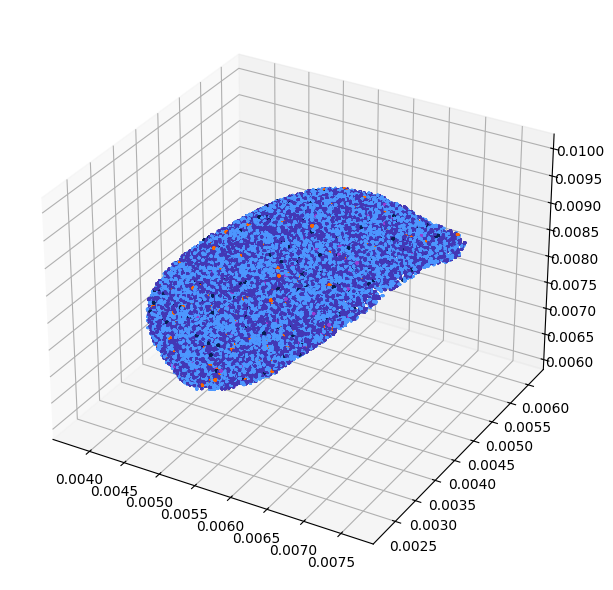

(<module 'matplotlib.pyplot' from '/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
 <Axes3D: >)

In [4]:
from snudda.plotting.plot_network import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False)

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Number of neurons: 49050
Synapse row 0 - 0.0 % time: 0.06638008300069487 seconds
Synapse row 1000000 - 82.89804949179351 % time: 1.2640243750010995 seconds
Created connection matrix 1.5062716260017623 seconds
GJ row : 0 - 0.0 %  time : 0.012225374999616179 seconds
Created gap junction connection matrix 0.012956208000105107 seconds
Creating population dictionary
Done.
Taking corner neurons: Keeping 0/49050
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 1206301, at 0
n_synapses = 1206301, at 1000000
Created distance histogram (optimised) in 0.5080219589999615 seconds
Saving cache to networks/striatum1000/network-synapses.hdf5-cache
Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 219/23750
Counting connections
Requested: 10000000.0 calculated [4041739.]
Num pairs outside plot range 1159511
P(d<5e-05) = 0.05263157894736842
P(d<0.0001) = 

/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1443: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


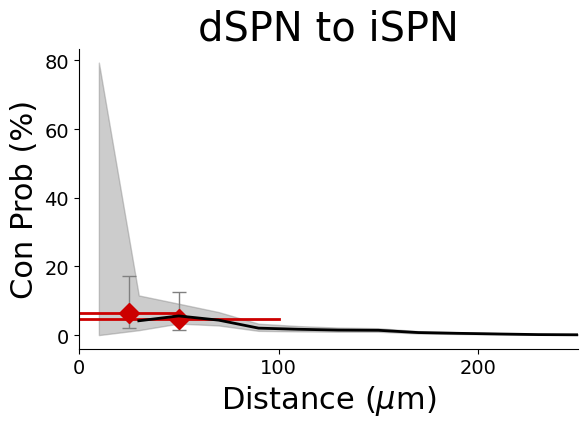

Wrote networks/striatum1000/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-3D-dist.png
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 206/23750
Counting connections
Requested: 10000000.0 calculated [3827193.]
Num pairs outside plot range 1065101
P(d<5e-05) = 0.14052287581699346
P(d<0.0001) = 0.08735177865612648


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1443: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


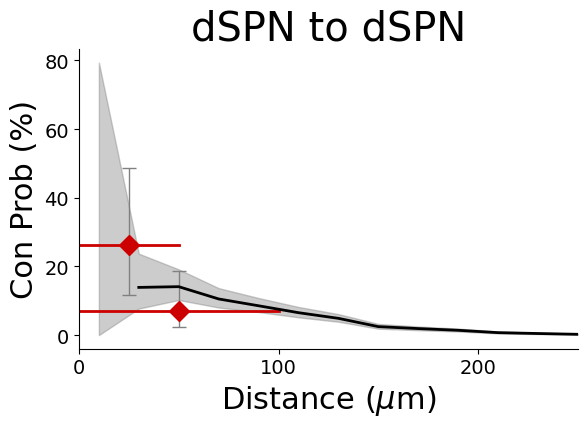

Wrote networks/striatum1000/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-3D-dist.png
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 206/23750
Counting connections
Requested: 10000000.0 calculated [3844462.]
Num pairs outside plot range 1048038
P(d<5e-05) = 0.18553459119496854
P(d<0.0001) = 0.1063321385902031


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1443: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


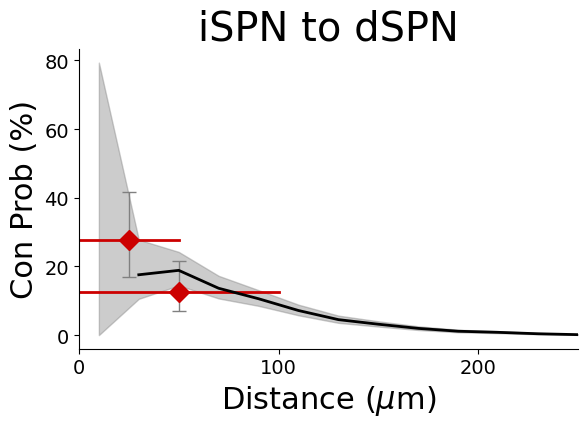

Wrote networks/striatum1000/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-3D-dist.png
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 219/23750
Counting connections
Requested: 10000000.0 calculated [4059386.]
Num pairs outside plot range 1141645
P(d<5e-05) = 0.31806615776081426
P(d<0.0001) = 0.20842572062084258


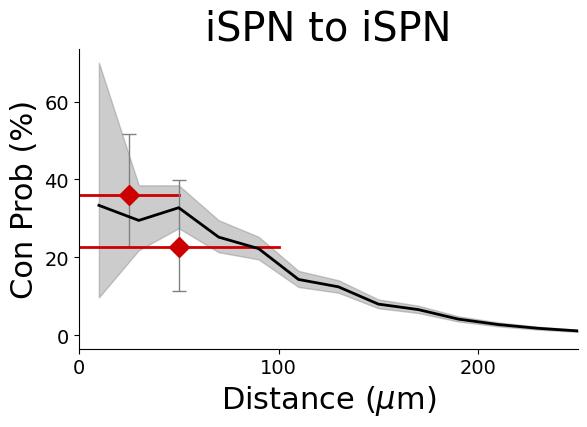

Wrote networks/striatum1000/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.png


({5e-05: 0.31806615776081426, 0.0001: 0.20842572062084258},
 'networks/striatum1000/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.png')

In [5]:
from snudda.analyse.analyse import SnuddaAnalyse

network_file = os.path.join(network_path, "network-synapses.hdf5")
nas = SnuddaAnalyse(network_file, volume_type="cube")

nas.plot_connection_probability("dSPN", "iSPN",
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data_detailed=[(3, 47), (3, 66)])
nas.plot_connection_probability("dSPN", "dSPN",
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data_detailed=[(5, 19), (3, 43)])
nas.plot_connection_probability("iSPN", "dSPN",
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data_detailed=[(13, 47), (10, 80)])
nas.plot_connection_probability("iSPN", "iSPN",
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data_detailed=[(14, 39), (7, 31)])